In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats

In [2]:
# matplotlib imports
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
df = pd.read_csv('titanic.csv')
df.shape
print(df.head().to_string())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class    who  adult_male deck  embark_town alive  alone
0         0       3    male  22.0      1      0   7.2500        S  Third    man        True  NaN  Southampton    no  False
1         1       1  female  38.0      1      0  71.2833        C  First  woman       False    C    Cherbourg   yes  False
2         1       3  female  26.0      0      0   7.9250        S  Third  woman       False  NaN  Southampton   yes   True
3         1       1  female  35.0      1      0  53.1000        S  First  woman       False    C  Southampton   yes  False
4         0       3    male  35.0      0      0   8.0500        S  Third    man        True  NaN  Southampton    no   True


In [4]:
df['age_bin'] = pd.qcut(df['age'], q = 10)
pdf = df.groupby('age_bin',observed=False,as_index=False).agg(
    **{
        "n": ("age_bin", "size"),
        "survival_rate": ("survived", "mean"),
        "survival_rate_male": ("survived", lambda x: (
            df.loc[x.index].query("sex == 'male'")['survived'].mean() if not x.empty else np.nan
        )),
        "survival_rate_female": ("survived", lambda x: (
            df.loc[x.index].query("sex == 'female'")['survived'].mean() if not x.empty else np.nan
        )),
        "mode_class": ("class", lambda x: x.value_counts().index[0]),
        "median_fare": ("fare", "median"),
        "mode_sex" : ("sex", lambda x: x.value_counts().index[0]),
    }
)
print(pdf.head().to_string())

         age_bin   n  survival_rate  survival_rate_male  survival_rate_female mode_class  median_fare mode_sex
0  (0.419, 14.0]  77       0.584416            0.538462              0.631579      Third        27.75     male
1   (14.0, 19.0]  87       0.390805            0.100000              0.783784      Third        10.50     male
2   (19.0, 22.0]  67       0.283582            0.108696              0.666667      Third         8.05     male
3   (22.0, 25.0]  70       0.371429            0.136364              0.769231      Third        13.00     male
4   (25.0, 28.0]  61       0.393443            0.255814              0.722222      Third        13.00     male


In [5]:
ts = pd.read_csv('flights.csv')
ts.shape

(144, 3)

### full example - mpl

In [51]:
print(pdf.head().to_string())

         age_bin   n  survival_rate  survival_rate_male  survival_rate_female mode_class  median_fare mode_sex
0  (0.419, 14.0]  77       0.584416            0.538462              0.631579      Third        27.75     male
1   (14.0, 19.0]  87       0.390805            0.100000              0.783784      Third        10.50     male
2   (19.0, 22.0]  67       0.283582            0.108696              0.666667      Third         8.05     male
3   (22.0, 25.0]  70       0.371429            0.136364              0.769231      Third        13.00     male
4   (25.0, 28.0]  61       0.393443            0.255814              0.722222      Third        13.00     male


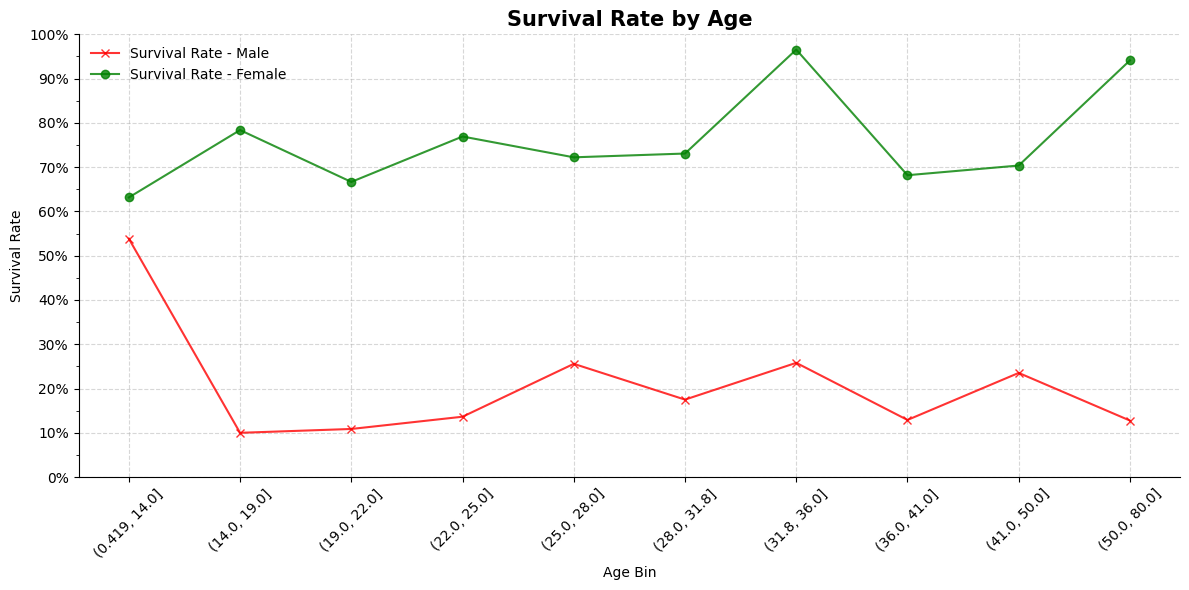

In [60]:
fig, ax = plt.subplots(figsize=(12, 6))

x_ticks = pdf['age_bin'].astype(str)

ax.plot(x_ticks, pdf['survival_rate_male'], alpha=0.8, marker='x', color='red', label= 'Survival Rate - Male')
ax.plot(x_ticks, pdf['survival_rate_female'], alpha=0.8, marker='o', color='green', label='Survival Rate - Female')

ax.set_title(f"Survival Rate by Age", fontsize=15, fontweight='bold')

ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticks, rotation=45)
ax.set_xlabel('Age Bin')

ax.set_ylabel("Survival Rate", loc="center")
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(1.0, decimals=0))
ax.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(2))
ax.set_ylim(0, 1)

ax.grid(True, linestyle='--', alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(loc='upper left', fontsize=10, frameon=False)

plt.tight_layout()

### full example - pd.plot

In [ ]:
    # pdf.plot(
    #     ax=ax, marker="o", rot=rotation,
    #     title=f"{col} by {index_names[1]}",
    #     legend=True,
    #     xlabel=index_names[1], ylabel=col, ylim=y_lim,
    #     grid=True,
    # )

### layout

[None, None, None, None, None, None, None, None, None, None]

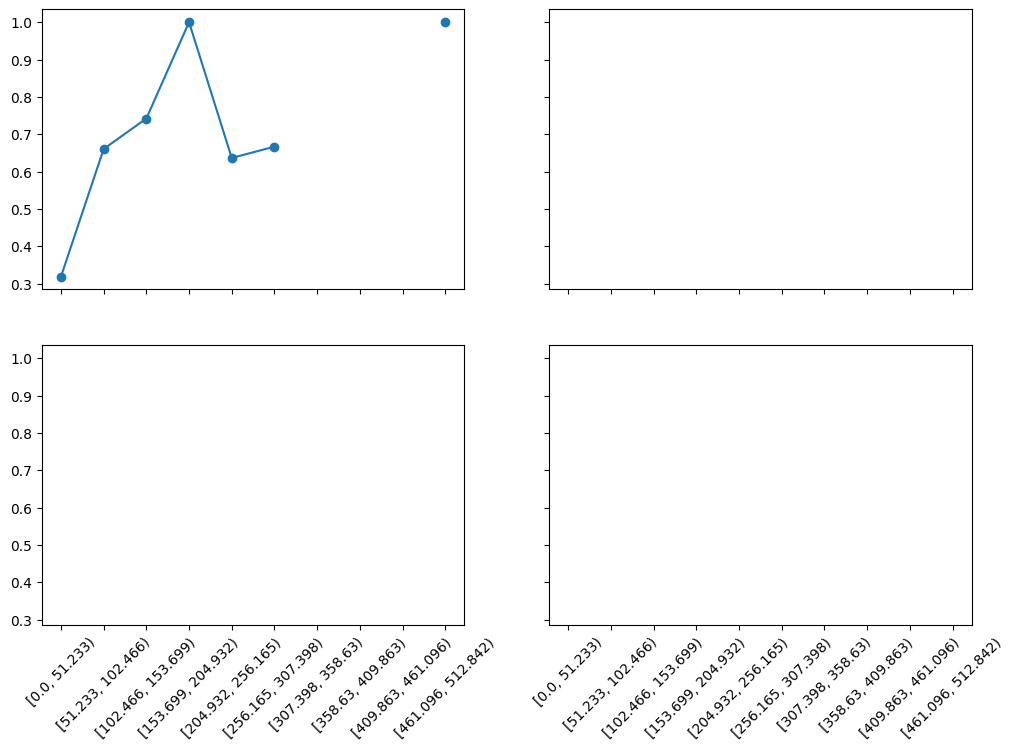

In [ ]:
# X = pdf.index
# Y = pdf['survived']

# fig, axs = plt.subplots(2,2, figsize=(12, 8), sharex=True, sharey=True)
# axs[0, 0].plot(X, Y, marker='o')
# axs[0, 0].xaxis.set_major_locator(mpl.ticker.FixedLocator(X))
# axs[0, 0].xaxis.set_major_formatter(mpl.ticker.FixedFormatter(pdf['fare_bin'].astype(str)))
# plt.setp(axs[1, 0].get_xticklabels(), rotation=45)
# plt.setp(axs[1, 1].get_xticklabels(), rotation=45)

In [ ]:
# plt.gridspec


In [ ]:
# mpl.gridspec

<module 'matplotlib.gridspec' from 'c:\\Users\\yzdom\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\matplotlib\\gridspec.py'>

In [ ]:
# ax.add_subplot


In [ ]:
# ax.spines

### key types of plots

In [ ]:
# plt.plot
# plt.scatter
# plt.bar
# plt.text
# plt.fill_between

In [ ]:
# plt.errorbar
# plt.hist
# plt.boxplot

### key elements

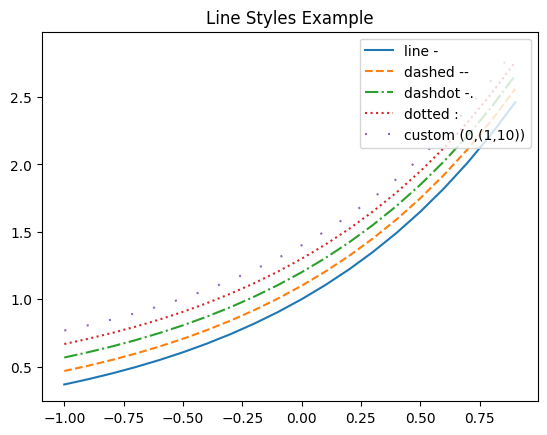

In [ ]:
# X = np.arange(-1, 1, 0.1)
# Y = np.exp(X)

# fig, ax = plt.subplots()

# ax.plot(X, Y, linestyle= '-') # linestyle or ls argument
# ax.plot(X, Y+0.1, ls ='--')
# ax.plot(X, Y+0.2, ls='-.')
# ax.plot(X, Y+0.3, ls=':')
# ax.plot(X, Y+0.4, ls=(0,(1,10)))

# ax.set_title('Line Styles Example')
# ax.legend(['line -', 'dashed --', 'dashdot -.', 'dotted :', 'custom (0,(1,10))'], 
#           loc='upper right')

In [ ]:
# plt.plot(marker='o',markevery=10)

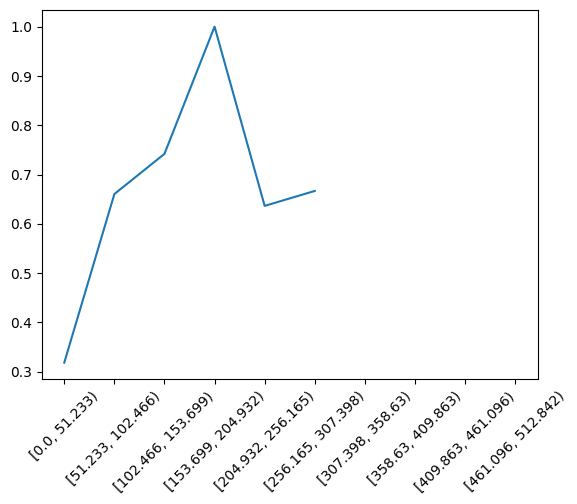

In [ ]:
# pdf = df.groupby('fare_bin', observed=False, as_index=False)['survived'].mean()
# X = pdf.index
# Y = pdf['survived']

# fig, ax = plt.subplots()
# ax.xaxis.set_major_locator(mpl.Ticker.FixedLocator(X))
# ax.xaxis.set_major_formatter(mpl.ticker.FixedFormatter(pdf['fare_bin'].astype(str)))
# plt.setp(ax.get_xticklabels(), rotation=45)

# ax.plot(X, Y, linestyle= '-')

In [ ]:
# labels

In [ ]:
# scales

In [ ]:
# text

In [ ]:
# legend

In [ ]:
# grid

In [ ]:
# color

### output

In [ ]:
# png in folder

In [ ]:
# excel

In [ ]:
# slides